# IR Assignment 2

## Classification

### **Objective**:
  - Build classifiers to predict the journal group.

### **Algorithms**:
  - **Artificial Neural Network (ANN)** (two architectures provided):
      - ANN Architecture 1: RELU activation layers.
      - ANN Architecture 2: GELU activation layers.
  - **Other Classifiers**: Naive Bayes (NB), Support Vector Machine (SVM), Logistic Regression (LoR), Random Forest (RF).

### **Tasks**:
  - Perform 10-fold cross-validation for all classifiers (except ANN).
  - Identify and rank the top 20 most important features for NB, RF, SVM, LoR.
  - Write explanations for feature importance in a README document and include the ranked lists in an Excel file.
  - Check what is the top 20 most important features for the ANN models.

### **ANN Specifics**:
  - Split data: Train (80%, with 10% validation from the train set) and Test (20%).
  - Use the given ANN architectures with specific configurations:
      - Maximum 15 epochs.
      - Batch size: 32.
      - Early stopping after 3 validation iterations without improvement.
      - Save the best model (ModelCheckpoint).

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
base_url = "https://raw.githubusercontent.com/dattali18/IR_Assignments/refs/heads/main/Assignment.01/output/doc2vec/"

file_names = ["aj", "bbc", "jp", "nyt"]

cluster_map =  {'aj' : 0, 'bbc': 1, 'jp' : 2, 'nyt': 3}

links = [f"{base_url}/{name}_doc2vec.csv" for name in file_names]

In [3]:
import pandas as pd

dfs = {}

for name, link in zip(file_names, links):
    df = pd.read_csv(link)
    # take all the col from 0 - 99 and put them into a numpy array
    df_cpy = pd.DataFrame()
    df_cpy['vector'] = df.iloc[:, :100].to_numpy().tolist()
    df_cpy["cluster"] = str(cluster_map[name])
    dfs[name] = df_cpy

In [4]:
# merge all of the df into one df

df = pd.concat(dfs.values(), ignore_index=True)

In [5]:
# standerdize the data mean=0 std=1
import numpy as np

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# apply to each line of the df

df['std_vector'] = df['vector'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())
df['std_vector'].head()

,std_vector
0,"[-0.9614479972007641, 0.6957987565937652, 0.59..."
1,"[-0.9792962849264775, 0.7375863705340073, 0.57..."
2,"[-0.9016816118502328, 0.7442563640622617, 0.59..."
3,"[-1.0004149361896462, 0.7354988385819545, 0.59..."
4,"[-0.8834392389517144, 0.8111157942320139, 0.57..."


In [7]:
# visualize the real cluster using t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

# transofrm the df['vector'] to dataframe with freatuer 0 - 99 for
df_copy = df['std_vector'].apply(pd.Series)

df_tsne = tsne.fit_transform(df_copy)

df_tsne = pd.DataFrame(df_tsne, columns=['x', 'y'])

df_tsne['cluster'] = df['cluster']

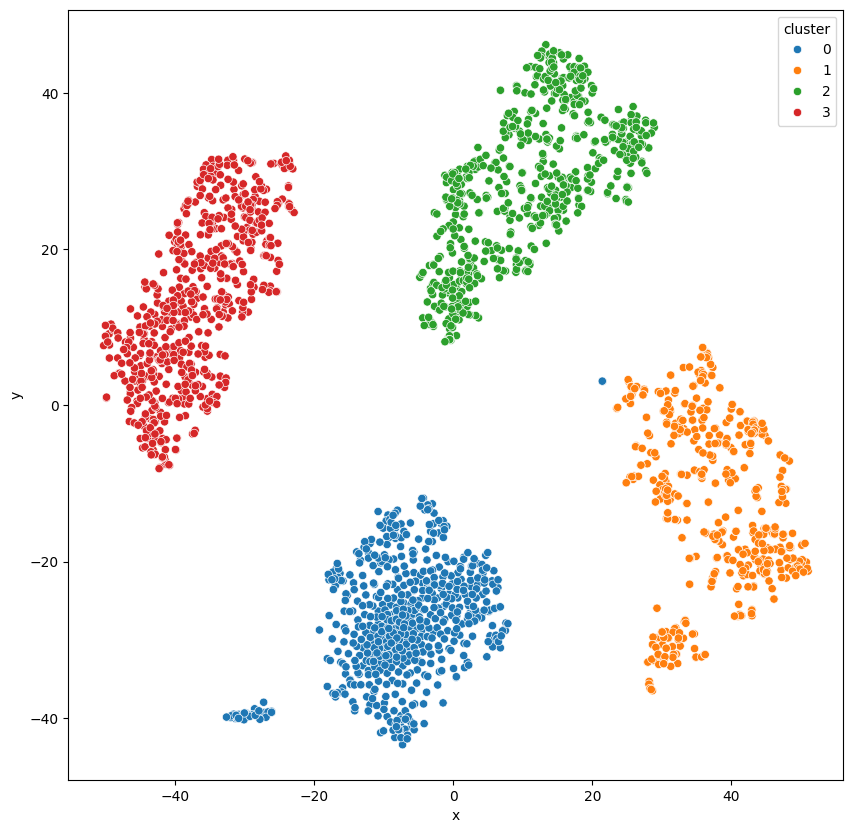

In [8]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="cluster")

plt.show()

# save the data
df.to_csv("doc2vec_tsne.csv", index=False)

In [9]:
# import all the the needed libraries NaiveBayes, SVM, LoR, RF
data = df['std_vector'].tolist()

In [10]:
data = np.array(data)

In [11]:
type(data)

numpy.ndarray

In [12]:
data.shape

(2346, 100)

## Naive Bayes Classifier

In [13]:
# naive bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = data
y = df['cluster'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train type:", type(X_train))
print("y_train type:", type(y_train))

X_train shape: (1665, 100)
y_train shape: (1665,)
X_train type: <class 'numpy.ndarray'>
y_train type: <class 'numpy.ndarray'>


In [14]:
# use Naive Bayes with 10-fold cross validation
from sklearn.model_selection import cross_val_score

gnb = GaussianNB()

scores = cross_val_score(gnb, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.02)


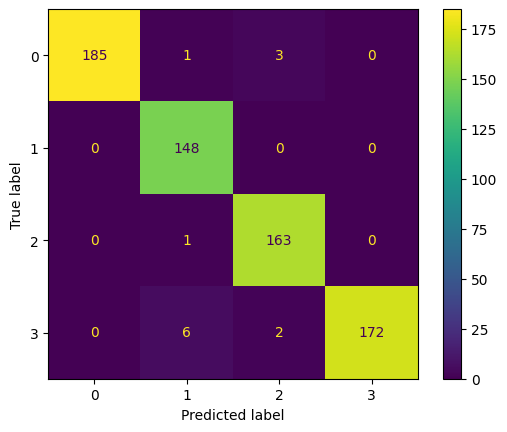

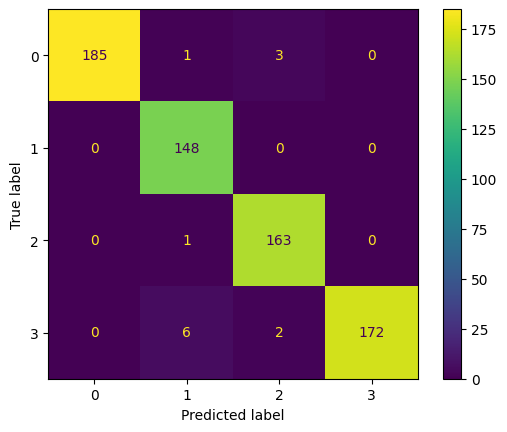

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

gnb.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(gnb, X_test, y_test)

disp.plot()

plt.show()

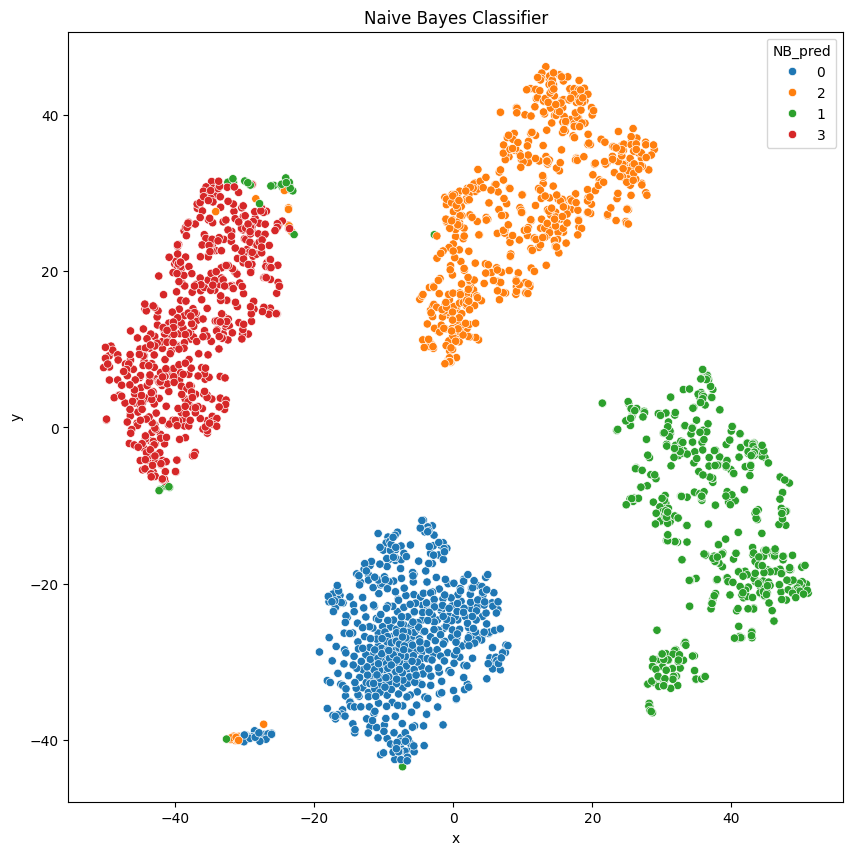

In [20]:
# get the calssification report for all X from the model and color the results using the tsne plot
df_tsne['NB_pred'] = gnb.predict(X)


plt.figure(figsize=(10, 10))

#  add title
plt.title("Naive Bayes Classifier")

sns.scatterplot(data=df_tsne, x="x", y="y", hue="NB_pred")

plt.show()

## SVM - Support Vector Machine

In [19]:
# use SVM with 10-fold cross validation
from sklearn.svm import SVC

svc = SVC()

scores = cross_val_score(svc, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


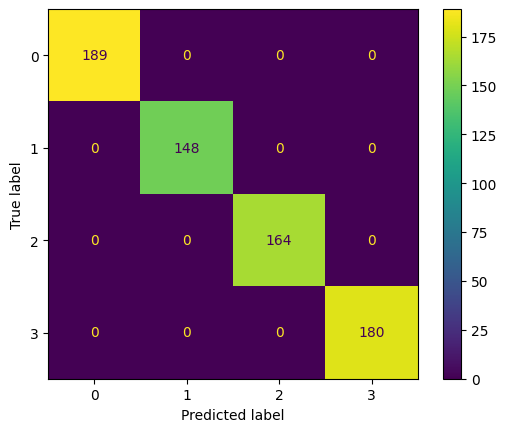

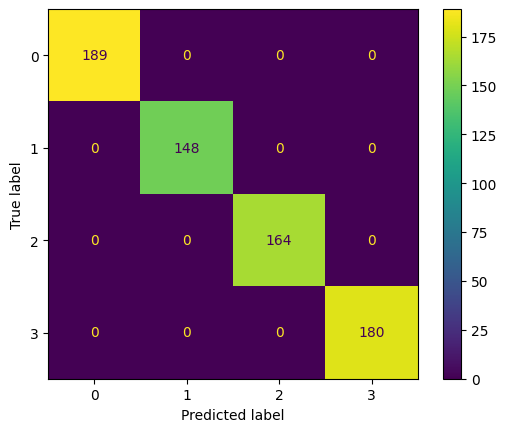

In [23]:
# same as NB

svc.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test)

disp.plot()

plt.show()

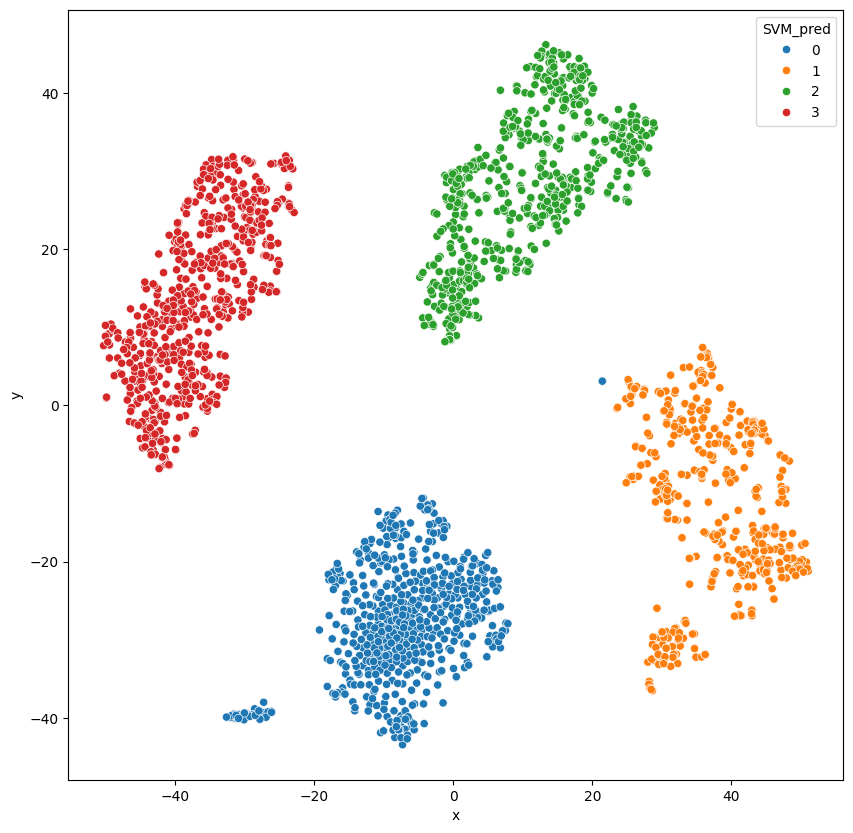

In [24]:
# get the calssification report for all X from the model and color the results using the tsne plot
df_tsne["SVM_pred"] = svc.predict(X)


plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="SVM_pred")

plt.show()

## Logistic Regression

In [25]:
# use Logistic Regression with 10-fold cross validation

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scores = cross_val_score(lr, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.01)


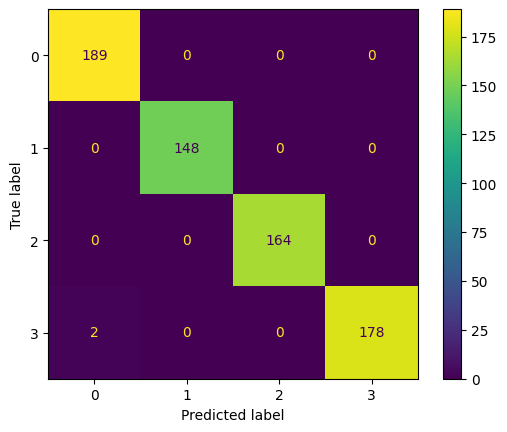

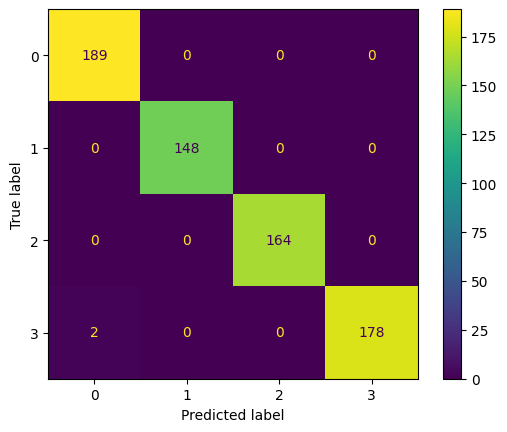

In [26]:
# same

# visualize the results of the classification for all the X

lr.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

disp.plot()

plt.show()

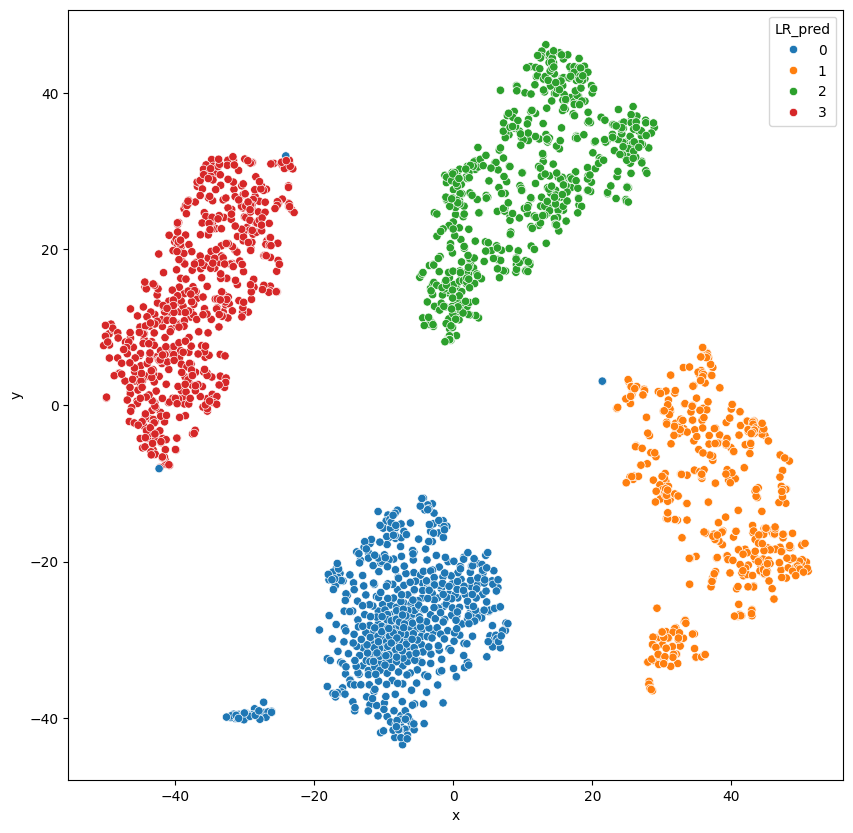

In [27]:
# plot the results using tsne

df_tsne["LR_pred"] = lr.predict(X)

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="LR_pred")

plt.show()

# RF - Random Forest Classifier

In [28]:
# use Random Forest with 10-fold cross validation

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.01)


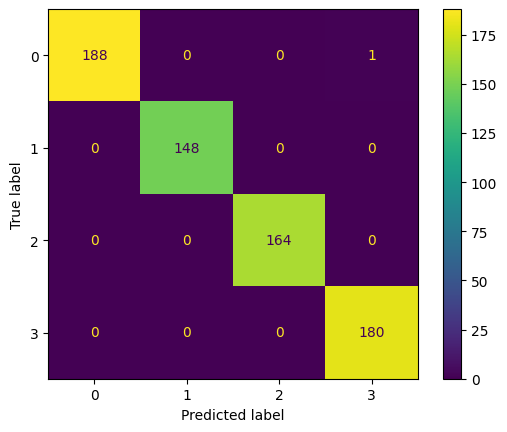

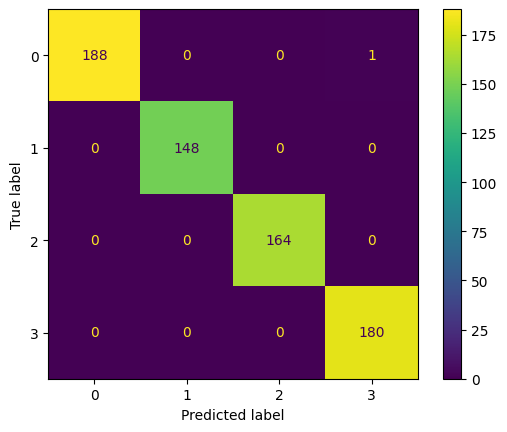

In [29]:
# same

# visualize the results of the classification for all the X

rf.fit(X_train, y_train)

disp = ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

disp.plot()

plt.show()

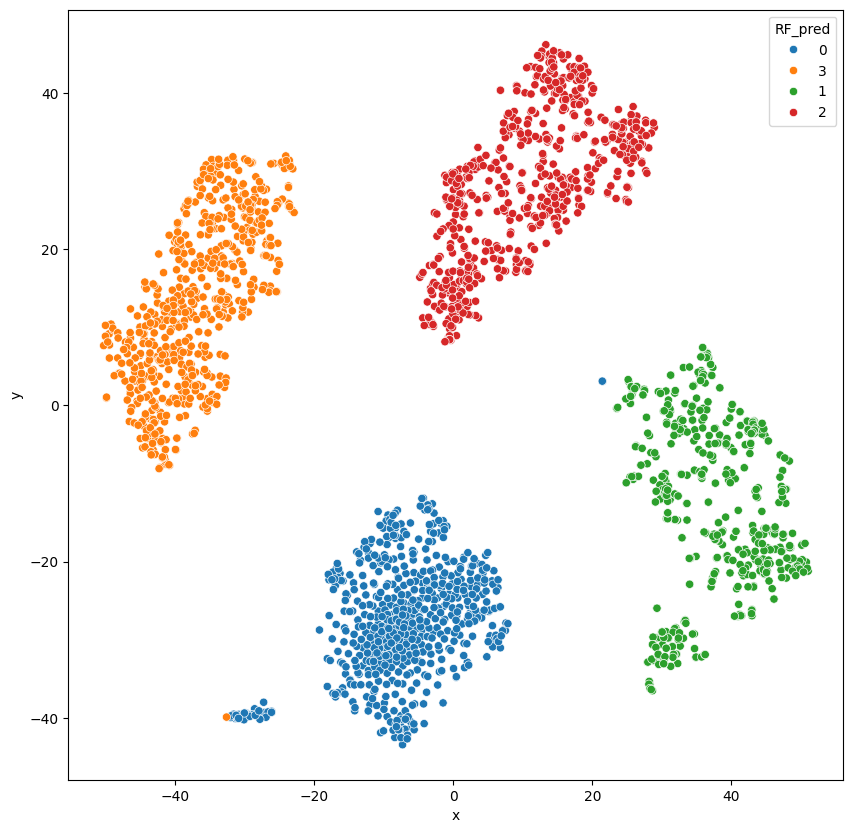

In [30]:
# plot the results using tsne

df_tsne["RF_pred"] = rf.predict(X)

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="RF_pred")

plt.show()

# ANN - Artificial Neural Network Classifier

We will build a NN using `tensorflow` and `keras` to classify the journal group.

The architecture of the NN is as follows:

- Embedding layer with 100 input dimensions.
- Hidden layer with 10 node and `relu` activation function.
- Hidden layer with 10 node and `relu` activation function.
- Hidden layer with 7 node and `relu` activation function.
- Output layer with 4 nodes and `softmax` activation function. (4 classes)

Seconde architecture:

- Embedding layer with 100 input dimensions.
- Hidden layer with 10 node and `gelu` activation function.
- Hidden layer with 10 node and `gelu` activation function.
- Hidden layer with 7 node and `gelu` activation function.
- Output layer with 4 nodes and `softmax` activation function. (4 classes)

In [36]:
X = X.astype(np.float32)
y = y.astype(int)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

model_1 = Sequential([
    Dense(100, activation='relu', input_shape=(100,)),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(7, activation='relu'),
    Dense(4, activation='softmax')
])

# compile the model
model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# fit the model
history = model_1.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.5008 - loss: 1.1708 - val_accuracy: 0.7261 - val_loss: 0.4780
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8816 - loss: 0.3191 - val_accuracy: 1.0000 - val_loss: 0.0458
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9998 - loss: 0.0277 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9993 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss

In [39]:
# model 2

model_2 = Sequential(
    [
        Dense(100, activation="gelu", input_shape=(100,)),
        Dense(10, activation="gelu"),
        Dense(10, activation="gelu"),
        Dense(7, activation="gelu"),
        Dense(4, activation="softmax"),
    ]
)

# compile the model
model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# fit the model
history = model_2.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.4899 - loss: 1.1962 - val_accuracy: 0.9096 - val_loss: 0.5046
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9698 - loss: 0.4108 - val_accuracy: 0.9947 - val_loss: 0.3087
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2932 - val_accuracy: 0.9947 - val_loss: 0.2548
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.2515 - val_accuracy: 1.0000 - val_loss: 0.1801
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1421 - val_accuracy: 0.9973 - val_loss: 0.0240
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 0.9973 - val_loss: 0.0079
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9973 - val_loss: 0.0060
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9973 - val_loss

In [40]:
# check the accuracy of the models

# model 1
loss, accuracy = model_1.evaluate(X_test, y_test)

print("Model 1 Accuracy: ", accuracy)

# model 2

loss, accuracy = model_2.evaluate(X_test, y_test)

print("Model 2 Accuracy: ", accuracy)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 0.0032
Model 1 Accuracy:  1.0
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 0.0027
Model 2 Accuracy:  1.0


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


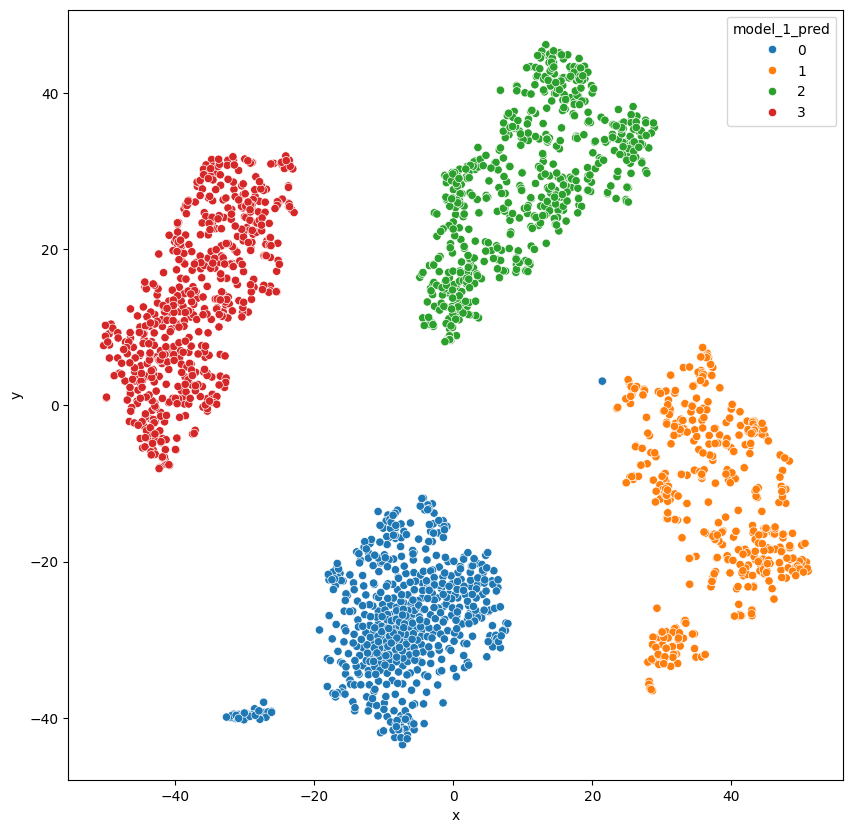

In [46]:
# plot the prediction for model 1

predictions = model_1.predict(X)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


df_tsne["model_1_pred"] = [str(cls) for cls in predicted_classes]

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="model_1_pred")

plt.show()

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


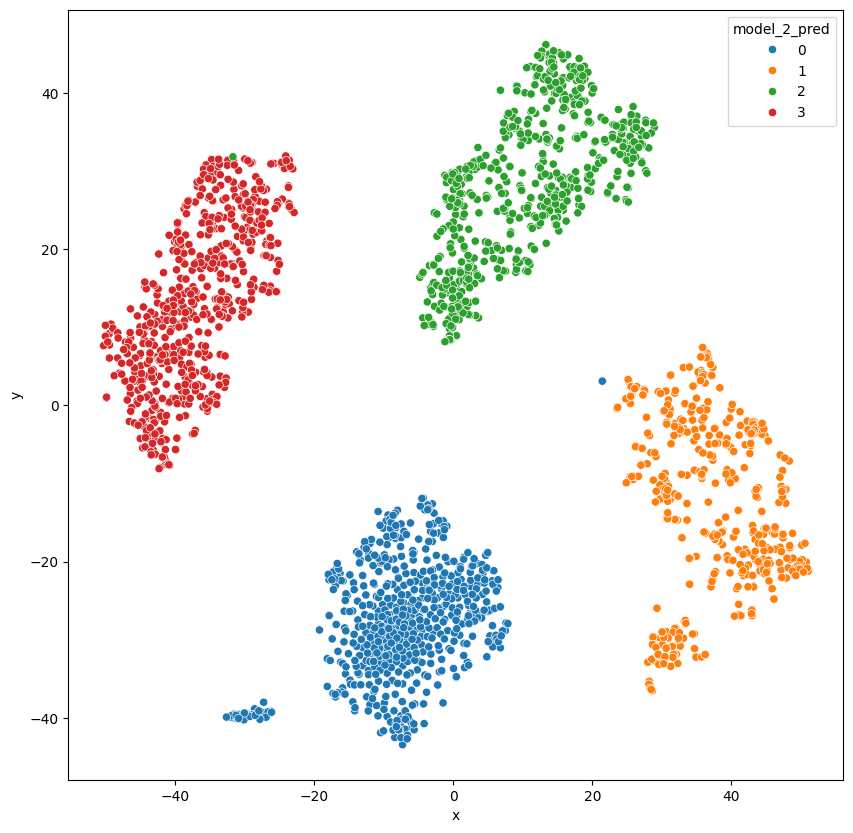

In [47]:
# plot the prediction for model 1

predictions = model_2.predict(X)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


df_tsne["model_2_pred"] = [str(cls) for cls in predicted_classes]

plt.figure(figsize=(10, 10))

sns.scatterplot(data=df_tsne, x="x", y="y", hue="model_2_pred")

plt.show()

In [48]:
# save the model into a file

model_1.save("model_1.h5")

model_2.save("model_2.h5")